In [3]:
#Import required libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1.  Reading, Understanding And Visualizing Data

In [5]:
#create dataframe from csv
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Check the descriptive information
df.info()

#No empty/null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# No of Row,No.of columns
df.shape

(730, 16)

In [8]:
#Check the column names with missing values
df.isnull().sum(axis=0)

#No missing values observed

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#checking duplicates
df.duplicated().sum()
#No duplicates were found

0

In [10]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [11]:
#As no duplicate records were found,
#Deleting the Instant column as it represents index number
#from the given data we can see that instant is an index column so we drop it
df.drop(['instant'],axis=1,inplace=True)
df.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [12]:
#Deleting dteday column as we have column for date and month separately
df.drop(['dteday'],axis=1,inplace=True)
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [13]:
#Deleteing casual and registered column
#as cnt column includes both casual and registerd customer
df.pop('casual')
df.pop('registered')
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985


In [14]:
df.shape

(730, 12)

In [15]:
df.describe()

#it seems that all the columns are int and float type
#seeing the data , it seems that no junk or outlier is in the data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualisation

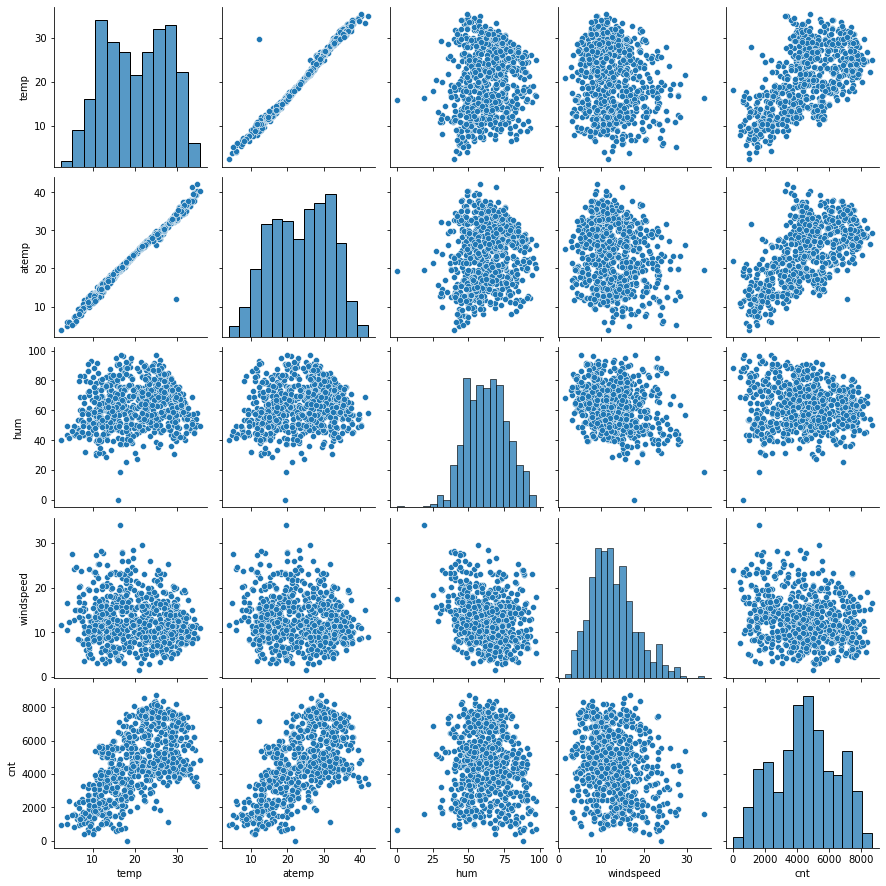

In [17]:
#Visualizing the relationship among all numeric varaibles
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#similar relation is observed for temp vs cnt and atemp vs cnt
#it seems there is a linear relationship between temp and atemp, which will be verified while model evaluation


In [18]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


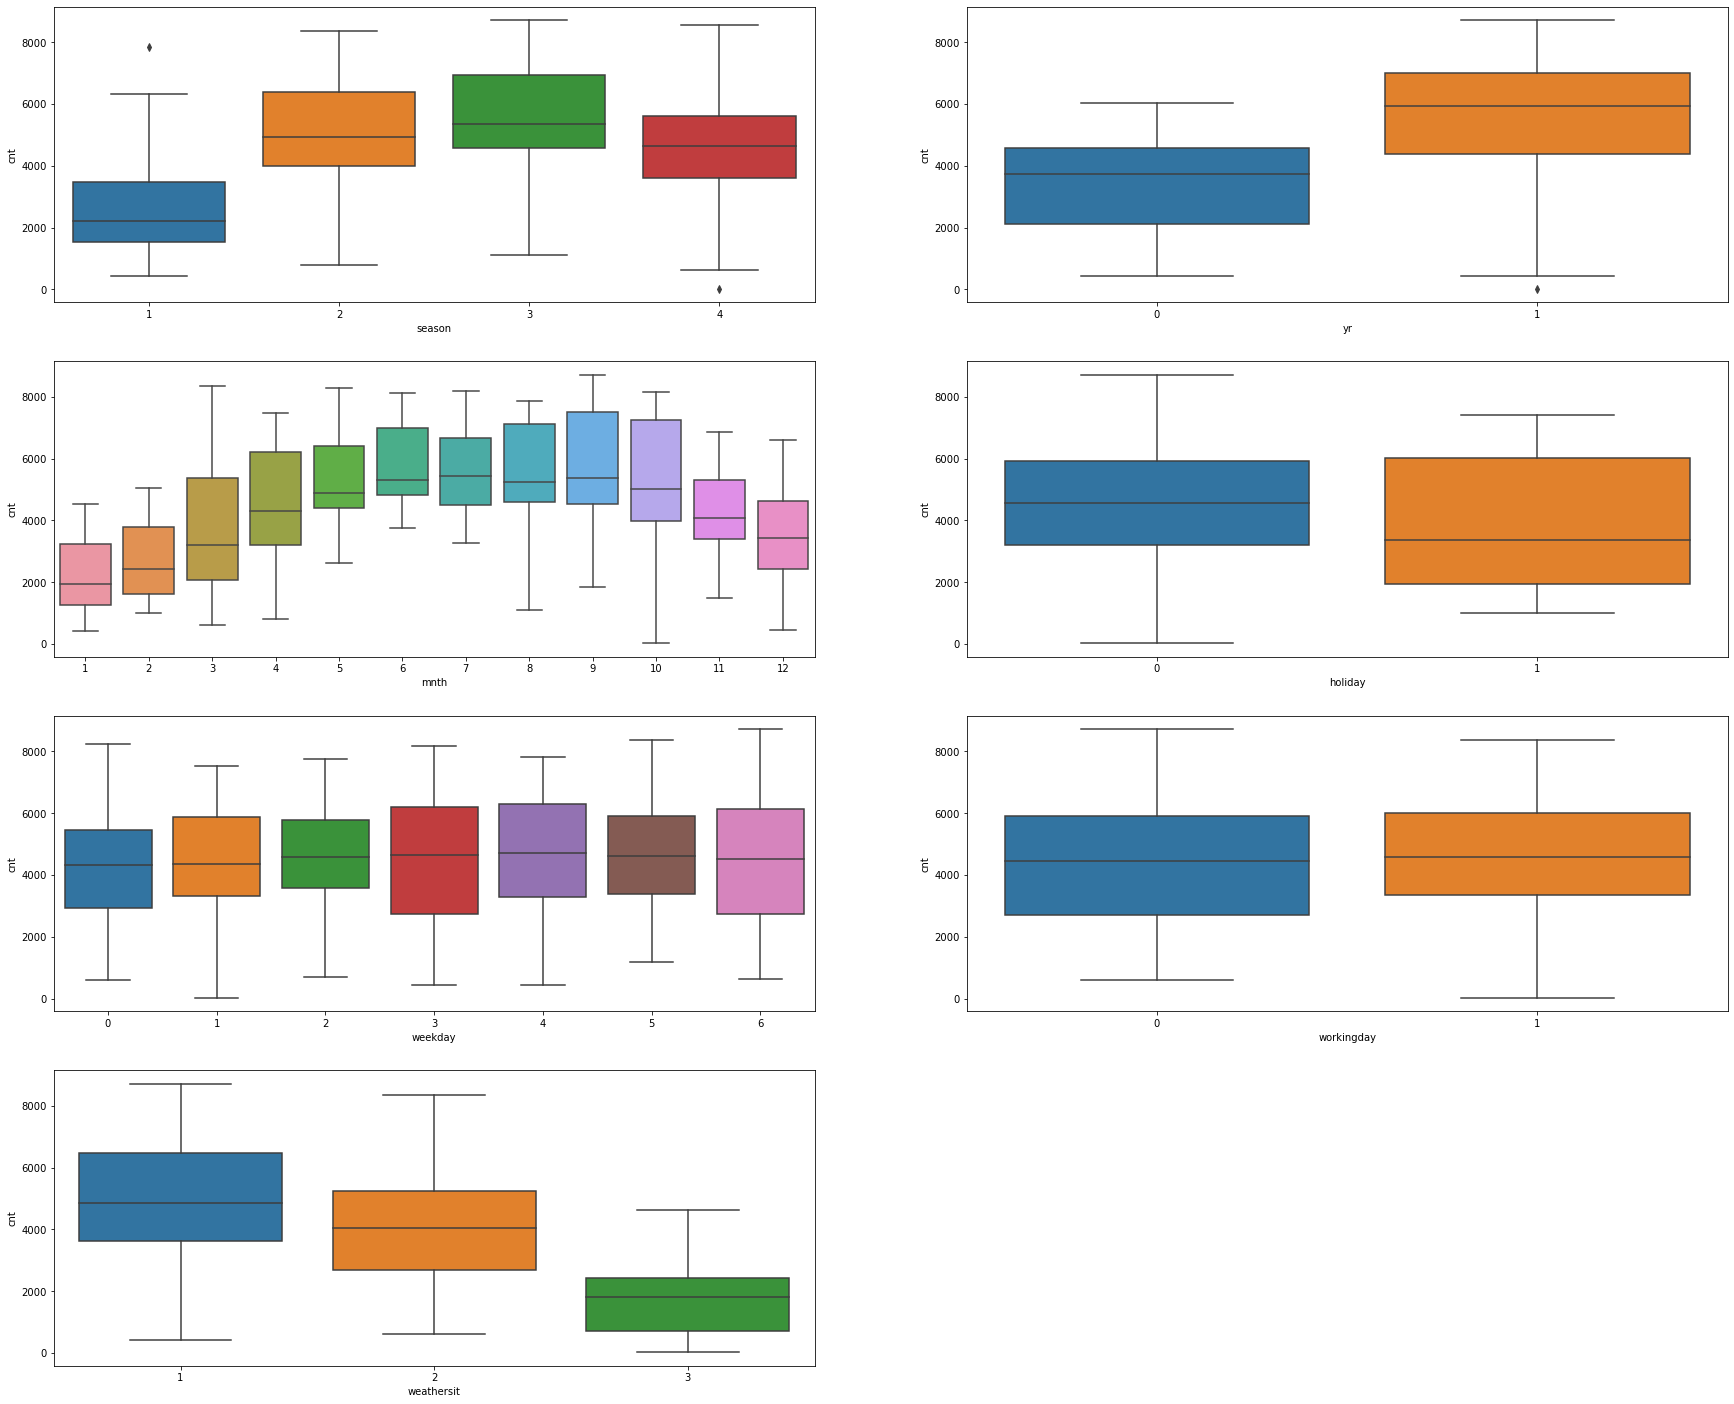

In [19]:
#Visualizing all categorical variables relationship with cnt

plt.figure(figsize=(30, 25))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()


#Count of bike sharing is least for spring(1: spring)
#Count of bike sharing is more for year 2019(1: 2019)
#Count of bike sharing increases from 4 th till 10 th month
# Avg. Count of bike sharing is less during holidays
# Count of bike sharing is more during Clear, Few clouds, Partly cloudy, Partly cloudy weather(represented as 1)

## 2. Data Preparation For Model

In [20]:
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985


In [21]:
# Converting some numeric values to categorical data
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [22]:
# maping seasons
df.season = df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [23]:
# mapping weathersit
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow',4:'Heavy Snow'})

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Convert to 'category' data type

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [26]:
df=pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_Spring             730 non-null    uint8  
 9   season_Summer             730 non-null    uint8  
 10  season_Winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

### Data Preparation for Modelling


In [27]:
df.shape

(730, 30)

In [28]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
#splitting the data to test and train data

#import required libraries
import sklearn
from sklearn.model_selection import train_test_split

#plit the datset to train(70%) and test(30 %)

df_train,df_test=train_test_split(df,train_size=0.7,random_state=100) 

#test the shape of train and test data
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [30]:
#Scaling the numerica data--Min Max Scaling

#import the required lib and create the ovj
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()#create obj


In [31]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [32]:
#checking the scaled data
df_train.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,1,0,1


In [33]:
#check min and max values
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Building and training the model

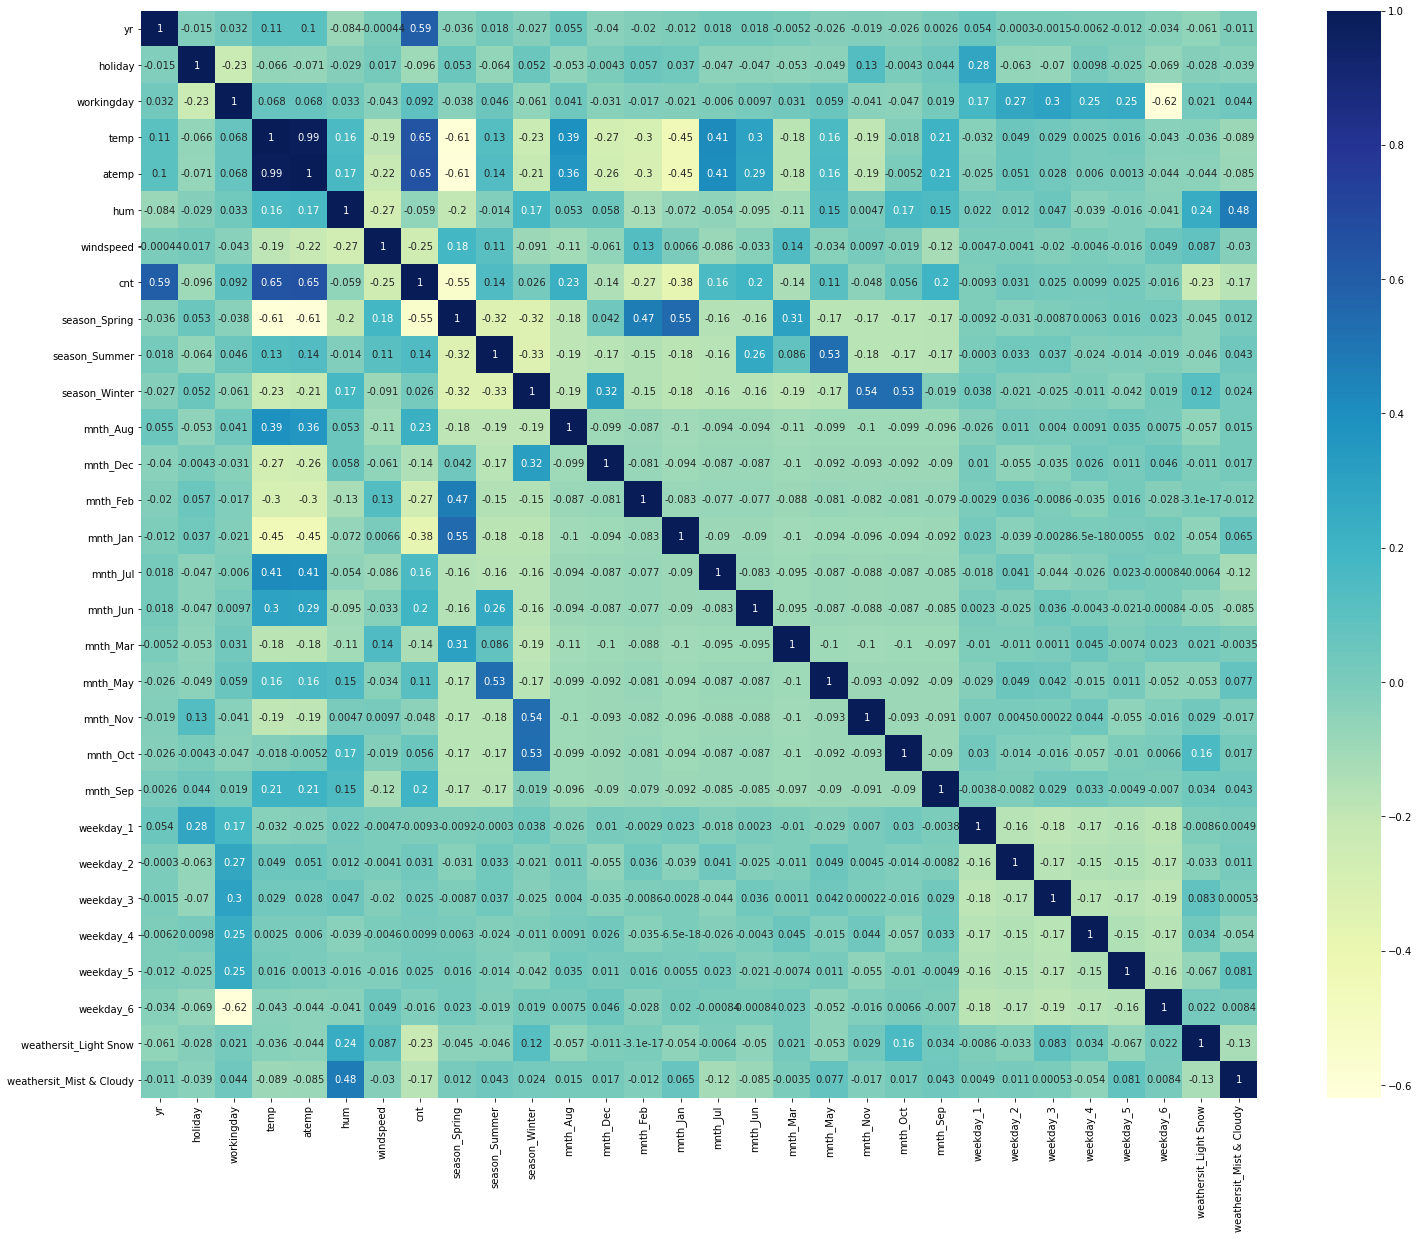

In [34]:
#Let check the correlation first

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

#we can see that multiple values are correlated and their might a chance for multicollinearity
#that we will check once the model is build

In [35]:
#Xtrain and y train
y_train=df_train.pop('cnt')
X_train=df_train

In [36]:
X_train.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
y_train.head(1)

576    0.827658
Name: cnt, dtype: float64

In [38]:
#Adding all the vaiables at once to linear model
#Using mixed approach to select the predictors - RFE and manual removal of one predictor at a time
#based on the value of VIF and P value we start remocing the variables


In [39]:
#import the required libraries
import statsmodels.api as sm
#add constant
X_train_sm=sm.add_constant(X_train)
X_train_sm.head(1)

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
lr_1=sm.OLS(y_train,X_train_sm).fit()

In [41]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.81e-180
Time:                        22:02:18   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2843      0.044      6.398      0.000       0.197       0.372
yr                           0.2325      0.008     28.794      0.000       0.217       0.248
holiday                     -0.0416      0.024     -1.758      0.079      -0.088       0.005
workingday                   0.0438      0.009      4.666      0.000       0.025       0.062
temp                         0.3880      0.142      2.727      0.007       0.108       0.668
atemp                        0.0590      0.138      0.426      0.670      -0.213       0.331
hum                         -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                   -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_Spring               -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_Summer                0.0424      0.026      1.617      0.107      -0.009       0.094
season_Winter                0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                     0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                    -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                    -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                    -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul                    -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_Jun                     0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                     0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                     0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                    -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep                     0.0868      0.032      2.711      0.007       0.024       0.150
weekday_1                   -0.0101      0.010     -1.033      0.302      -0.029       0.009
weekday_2                   -0.0069      0.011     -0.616      0.538      -0.029       0.015
weekday_3                    0.0057      0.011      0.538      0.591      -0.015       0.026
weekday_4                    0.0018      0.011      0.168      0.867      -0.020       0.023
weekday_5                    0.0116      0.011      1.029      0.304      -0.011       0.034
weekday_6                    0.0542      0.015      3.729      0.000       0.026       0.083
weathersit_Light Snow       -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist & Cloudy    -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============

In [42]:
#Considered p value to be < 0.05, there are lot of coeeficient with high p value
#So we need to remove values with high p values.
#Before that lets calculate VIF and then make decision

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
23,weekday_3,inf
2,workingday,inf
21,weekday_1,inf
22,weekday_2,inf
1,holiday,inf
25,weekday_5,inf
3,temp,437.82
4,atemp,383.64
5,hum,37.43


In [45]:
#As we can see there are good number of variables with large VIF values
#Better lets use RFE for feature selection,thus reducing the variable count

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_6', 'weathersit_Light Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
X_train_rfe.shape

(510, 15)

In [52]:
#Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.46
7,season_Summer,2.85
14,weathersit_Mist & Cloudy,2.29
0,yr,2.09
12,weekday_6,1.98


In [53]:
X_train_sm = sm.add_constant(X_train_rfe)
lr_2=sm.OLS(y_train,X_train_sm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          4.22e-191
Time:                        22:02:33   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2519      0.036      6.969      0.000       0.181       0.323
yr                           0.2305      0.008     28.795      0.000       0.215       0.246
holiday                     -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                   0.0433      0.012      3.762      0.000       0.021       0.066
temp                         0.5096      0.034     14.837      0.000       0.442       0.577
hum                         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                   -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_Spring               -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                    -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                    -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                     0.0814      0.016      4.945      0.000       0.049       0.114
weekday_6                    0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist & Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#As observed above for 2nd model we build,p values are fine ,but VIF is high for hum
#so dropping hum
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [55]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_Spring,3.07
6,season_Summer,2.34
0,yr,2.08
7,season_Winter,1.98
11,weekday_6,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


In [56]:
#3rd Model
X_train_sm = sm.add_constant(X_train_rfe)
lr_3=sm.OLS(y_train,X_train_sm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.60e-188
Time:                        22:02:34   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1737      0.031      5.520      0.000       0.112       0.235
yr                           0.2345      0.008     29.009      0.000       0.219       0.250
holiday                     -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                   0.0464      0.012      3.966      0.000       0.023       0.069
temp                         0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                   -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_Spring               -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer                0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter                0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                    -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul                    -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                     0.0755      0.017      4.527      0.000       0.043       0.108
weekday_6                    0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist & Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Temp and workingday has high VIF >5 in 3rd model
#But removing workingday as from our general understanding temp can have impact on cnt
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)

In [58]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,season_Spring,2.76
5,season_Summer,2.24
0,yr,2.07
6,season_Winter,1.80
7,mnth_Jan,1.61
8,mnth_Jul,1.59
12,weathersit_Mist & Cloudy,1.56
9,mnth_Sep,1.34


In [59]:
#4th Model
X_train_sm = sm.add_constant(X_train_rfe)
lr_4=sm.OLS(y_train,X_train_sm).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.48e-186
Time:                        22:02:35   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2120      0.030      6.978      0.000       0.152       0.272
yr                           0.2347      0.008     28.620      0.000       0.219       0.251
holiday                     -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                         0.4734      0.034     13.837      0.000       0.406       0.541
windspeed                   -0.1570      0.025     -6.226      0.000      -0.207      -0.107
season_Spring               -0.0615      0.021     -2.902      0.004      -0.103      -0.020
season_Summer                0.0437      0.015      2.871      0.004       0.014       0.074
season_Winter                0.0755      0.017      4.334      0.000       0.041       0.110
mnth_Jan                    -0.0386      0.018     -2.159      0.031      -0.074      -0.003
mnth_Jul                    -0.0508      0.019     -2.735      0.006      -0.087      -0.014
mnth_Sep                     0.0762      0.017      4.504      0.000       0.043       0.109
weekday_6                    0.0201      0.011      1.787      0.075      -0.002       0.042
weathersit_Light Snow       -0.2859      0.025    -11.619      0.000      -0.334      -0.238
weathersit_Mist & Cloudy    -0.0794      0.009     -9.097      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Weekday_ has high p value, removing that
X_train_rfe = X_train_rfe.drop(["weekday_6"], axis = 1)

In [61]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,season_Spring,2.75
5,season_Summer,2.24
0,yr,2.07
6,season_Winter,1.78
7,mnth_Jan,1.61
8,mnth_Jul,1.59
11,weathersit_Mist & Cloudy,1.56
9,mnth_Sep,1.34


In [62]:
#5th Model
X_train_sm = sm.add_constant(X_train_rfe)
lr_5=sm.OLS(y_train,X_train_sm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          8.14e-187
Time:                        22:02:36   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2154      0.030      7.088      0.000       0.156       0.275
yr                           0.2343      0.008     28.517      0.000       0.218       0.250
holiday                     -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                         0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                   -0.1549      0.025     -6.135      0.000      -0.205      -0.105
season_Spring               -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_Summer                0.0434      0.015      2.845      0.005       0.013       0.073
season_Winter                0.0757      0.017      4.335      0.000       0.041       0.110
mnth_Jan                    -0.0383      0.018     -2.138      0.033      -0.073      -0.003
mnth_Jul                    -0.0503      0.019     -2.706      0.007      -0.087      -0.014
mnth_Sep                     0.0764      0.017      4.506      0.000       0.043       0.110
weathersit_Light Snow       -0.2854      0.025    -11.575      0.000      -0.334      -0.237
weathersit_Mist & Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Removing windspeed due to high VIF
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)

In [64]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
3,season_Spring,1.99
4,season_Summer,1.94
6,mnth_Jan,1.60
7,mnth_Jul,1.59
5,season_Winter,1.57
10,weathersit_Mist & Cloudy,1.56
8,mnth_Sep,1.34
9,weathersit_Light Snow,1.07


In [65]:
#6th Model
X_train_sm = sm.add_constant(X_train_rfe)
lr_6=sm.OLS(y_train,X_train_sm).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          3.83e-180
Time:                        22:02:37   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1586      0.030      5.289      0.000       0.100       0.218
yr                           0.2330      0.009     27.382      0.000       0.216       0.250
holiday                     -0.0999      0.027     -3.710      0.000      -0.153      -0.047
temp                         0.4914      0.035     13.894      0.000       0.422       0.561
season_Spring               -0.0734      0.022     -3.351      0.001      -0.116      -0.030
season_Summer                0.0344      0.016      2.188      0.029       0.004       0.065
season_Winter                0.0791      0.018      4.376      0.000       0.044       0.115
mnth_Jan                    -0.0240      0.018     -1.307      0.192      -0.060       0.012
mnth_Jul                    -0.0513      0.019     -2.659      0.008      -0.089      -0.013
mnth_Sep                     0.0810      0.018      4.617      0.000       0.047       0.116
weathersit_Light Snow       -0.3002      0.025    -11.804      0.000      -0.350      -0.250
weathersit_Mist & Cloudy    -0.0778      0.009     -8.596      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       68.324   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.088
Skew:                          -0.692   Prob(JB):                     3.16e-37
Kurtosis:                       5.449   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Removing mnth_Jan due to high p value
X_train_rfe = X_train_rfe.drop(["mnth_Jan"], axis = 1)

In [67]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,season_Summer,1.94
6,mnth_Jul,1.58
5,season_Winter,1.57
9,weathersit_Mist & Cloudy,1.55
3,season_Spring,1.40
7,mnth_Sep,1.34
8,weathersit_Light Snow,1.07
1,holiday,1.04


In [68]:
#7th Model
X_train_sm = sm.add_constant(X_train_rfe)
lr_7=sm.OLS(y_train,X_train_sm).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.71e-181
Time:                        22:02:37   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1501      0.029      5.124      0.000       0.093       0.208
yr                           0.2326      0.009     27.333      0.000       0.216       0.249
holiday                     -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temp                         0.5029      0.034     14.670      0.000       0.436       0.570
season_Spring               -0.0766      0.022     -3.514      0.000      -0.119      -0.034
season_Summer                0.0367      0.016      2.342      0.020       0.006       0.067
season_Winter                0.0829      0.018      4.642      0.000       0.048       0.118
mnth_Jul                    -0.0523      0.019     -2.715      0.007      -0.090      -0.014
mnth_Sep                     0.0812      0.018      4.623      0.000       0.047       0.116
weathersit_Light Snow       -0.2989      0.025    -11.756      0.000      -0.349      -0.249
weathersit_Mist & Cloudy    -0.0785      0.009     -8.669      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hypothesis testing

- H0:B1=B2=B3=...BN=0
- H1:Atleast one of the B !=0
#### According to above data, all the coefficients have some value, do  WE REJECT NULL HYPOTHESIS


 ### Interpretation
 
 - As VIF< 5 and P values <0.05 (Under acceptable range)
 - As VIF<5, no multicollinearity
 - None of the coefficient is 0.
 - F-Statistic value is greater than 1 So the coefficient has significance
 - Adjusted R2 is 0.82 : 82% variance in cnt is explained by the above model
 So, above model is acceptable 
 
 #### The equation of best fitted surface based on model 
 
 cnt=0.1501 +(0.2326 *yr)+(-0.1003*holiday)+(0.5029*temp)+(-0.0766*season_Spring)+(0.0367*season_Summer)+(0.0829*season_Winter)+
 (-0.0523*mnth_July)+(0.0812*mnth_Sept)+(-0.2989*weathersit_Light Snow)+(-0.0785*weathersit_Mist & Cloudy)
 
 
 

## 4. Residual Analysis

In [69]:
y_train_pred=lr_7.predict(X_train_sm)
y_train_pred

576    0.740301
426    0.450117
728    0.429355
482    0.539857
111    0.282193
         ...   
578    0.817183
53     0.175391
350    0.279333
79     0.340953
520    0.642733
Length: 510, dtype: float64

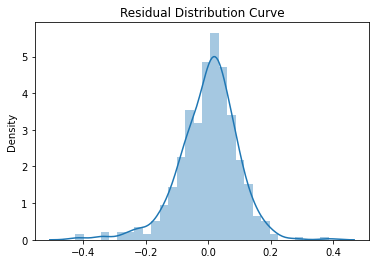

In [85]:
res=y_train-y_train_pred
plt.title('Residual Distribution Curve')
sns.distplot(res)
plt.show()

In [71]:
#From the above histogram,
#we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## 5. Predication and Evaluation on test Set

In [72]:
df_test.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,0,0,0


In [73]:
# Rescaling the test dataset using transorm()
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0


In [74]:
y_test=df_test.pop('cnt')
X_test=df_test


In [75]:
#add constant
X_test_sm=sm.add_constant(X_test)

In [76]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light Snow', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [77]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [78]:
#List of columns to be excluded from test set
del_col=X_train_sm.columns
del_col
#del_col=['workingday','atemp','hum','windspeed','mnth_Aug','mnth_Dec', 'mnth_Feb', 'mnth_Jan','mnth_Jun', 'mnth_Mar','mnth_May', 'mnth_Nov', 'mnth_Oct','weekday_1','weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',]

Index(['const', 'yr', 'holiday', 'temp', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [79]:
#X_test_sm=X_test_sm.drop(del_col,axis=1)
X_test_sm=X_test_sm[del_col]
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [80]:
print(X_train_sm.shape)
print(X_test_sm.shape)

(510, 11)
(220, 11)


In [81]:
y_test_pred=lr_7.predict(X_test_sm)
y_test_pred

184    0.337341
535    0.872633
299    0.411976
221    0.593462
152    0.597735
         ...   
702    0.726687
127    0.480760
640    0.762071
72     0.240236
653    0.721987
Length: 220, dtype: float64

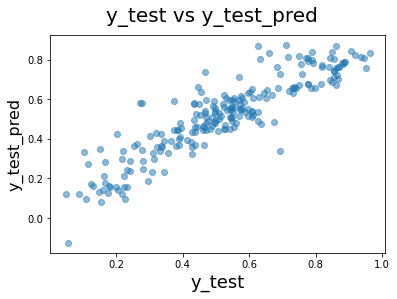

In [84]:
# Plotting y_test and y_pred to understand the spread
%matplotlib inline
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 18) # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [86]:
#Checking the Adjusted R2 value using SKlearn for test set

#required library

from sklearn.metrics import r2_score

In [87]:
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.8092660294132243

In [88]:
#Checking the same for train set too
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train
#its similar as we got using stats model

0.8238197981422828

In [89]:
#As the value of adjusted R2 is similar for both train and train set
#The model is good and we can use it as a generalized model for different datasets.

## Final Report

 ### We know,the equation of best fitted surface based on model 
 
 cnt=0.1501 +(0.2326 *yr)+(-0.1003*holiday)+(0.5029*temp)+(-0.0766*season_Spring)+(0.0367*season_Summer)+(0.0829*season_Winter)+
 (-0.0523*mnth_July)+(0.0812*mnth_Sept)+(-0.2989*weathersit_Light Snow)+(-0.0785*weathersit_Mist & Cloudy)
 
#### All the positive coefficients like temp,season_Summer,season_Winter,mnth_Sep indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.


- Temp is the most significant,one unit increase of temp will increase the cnt by 0.5029.
- Next is weathersit_LightSnow,one unit increase in weathersit_LightSnow will decrease the cnt by 0.2989.
- Followed by yr,season_Summer,season_winter,where increase in this predictor values increases the target variable.
- During holidays rental decreases.
- During cloudy weather the rentals decreases.
